In [10]:
pip install tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
pip install tensorflow_hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [13]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd


In [14]:
pd.set_option("display.precision", 8)


In [57]:
data_root='/content/drive/MyDrive/Train/'


In [58]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/MyDrive/Train/
Found 56 images belonging to 26 classes.
Found 224 images belonging to 26 classes.


In [59]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 26)
['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '3' '4' '5' '6' '7' '8' '9']


In [60]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 26)                33306     
                                                                 
Total params: 2,291,290
Trainable params: 33,306
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
7/7 [==============================] - 6s 432ms/step - loss: 3.5192 - acc: 0.0580 - val_loss: 2.6427 - val_acc: 0.2500
Epoch 2/10
7/7 [==============================] - 1s 111ms/step - loss: 2.6950 - acc: 0.2277 - val_loss: 1.9565 - val_acc: 0.5714
Epoch 3/10
7/7 [==============================] - 1s 107ms/step - loss: 1.9999 - acc: 0.4866 - val_loss: 1.4066 - val_acc: 0.8571
Epoch 4/10
7/7 [==============================] - 1s 105ms/step - loss: 1.4645 - acc: 0.6786 - val_loss: 0.9877 - val_acc: 0.9286
Epoch 5/10
7/7 [==============================] - 1s 107ms/step - loss: 1.1785 - acc: 0.7723 - val_loss: 0.7071 - val_acc: 0.9643
Epoch 6/10
7/7 [==============================] - 1s 112ms/step - loss: 0.8244 - acc: 0.8750 - val_loss: 0.5217 - val_acc: 0.9643
Epoch 7/10
7/7 [==============================] - 1s 110ms/step - loss: 0.6498 - acc: 0.9196 - val_loss: 0.3933 - val_acc: 0.9643
Epoch 8/10
7/7 [==============================] - 1s 135ms/step - loss: 0.4697 - acc: 0.95

In [69]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

2/2 [==============================] - 0s 61ms/step - loss: 0.2052 - acc: 0.9643
Final loss: 0.21
Final accuracy: 96.43%


In [64]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD



In [67]:
import keras
import keras.utils
from keras import utils as np_utils

In [87]:
path = 'path.h5'
model.save(path)

In [90]:
model = tf.keras.models.load_model((path),custom_objects={'KerasLayer':hub.KerasLayer})


In [92]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [93]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()


Prediction results for the first elements


,0,1,10,11,12,13,14,15,16,17,...,23,24,25,3,4,5,6,7,8,9
0,0.00485992,0.00759428,0.00028539,0.00034498,0.00909961,0.01385779,0.00130189,0.01969044,0.02207093,0.00390000,...,0.00670294,0.73194128,0.00832936,0.00067741,0.00199544,0.01320423,0.04487229,0.00014202,0.00123881,0.00750809
1,0.00332648,0.00687899,0.00026215,0.00061600,0.01624640,0.00435952,0.00052497,0.01539028,0.84297276,0.00511981,...,0.00057994,0.02509923,0.00451036,0.00116455,0.00088185,0.00671807,0.01306562,0.00012537,0.00332542,0.01662870
2,0.00745572,0.00610170,0.00430075,0.00052142,0.00159335,0.01145819,0.00689465,0.00284698,0.00313648,0.01330282,...,0.00954445,0.00990571,0.83005828,0.00390902,0.01359150,0.00809788,0.00732406,0.00040958,0.00366091,0.00675859
3,0.00747871,0.00630647,0.00648808,0.00150089,0.00905602,0.00836007,0.00121746,0.00362965,0.00431996,0.00517070,...,0.01655948,0.00985545,0.00998244,0.00786980,0.00630561,0.80195659,0.03937606,0.00076544,0.00460053,0.00471616
4,0.01670409,0.01474632,0.00129946,0.00188851,0.01528390,0.01054794,0.00687342,0.00145380,0.00201988,0.01212124,...,0.00119821,0.00129274,0.00576930,0.00364424,0.00298623,0.00459395,0.00142564,0.00229654,0.86598635,0.01199199


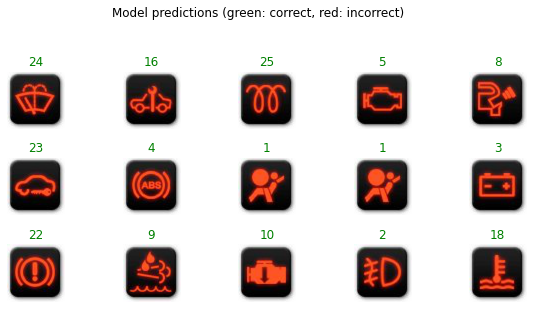

In [95]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(15):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [35]:
!rmdir "tflite_models"


In [36]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/car.tflite"
TFLITE_QUANT_MODEL = "tflite_models/car_quant.tflite"


In [38]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : model(x))


In [39]:
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

In [48]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmp60dx_hk2/assets


INFO:tensorflow:Assets written to: /tmp/tmp60dx_hk2/assets


9000476

In [50]:
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

INFO:tensorflow:Assets written to: /tmp/tmps4l34oom/assets


INFO:tensorflow:Assets written to: /tmp/tmps4l34oom/assets


TFLite models and their sizes:
total 12M
-rw-r--r-- 1 root root 2.6M Jul  9 17:55 car_quant.tflite
-rw-r--r-- 1 root root 8.6M Jul  9 17:52 car.tflite
